In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("C:\\Users\\ncgam\\Documents\\Kuliah\\Visualisasi Data\\BL-Flickr-Images-Book.xlsx")
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,FORBES\t Walter.,NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,A.\t A. A.,BLAZE DE BURY\t Marie Pauline Rose - Baroness,NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,Bradbury\t Evans & Co.,Love the Avenger. By the author of “All for Gr...,A.\t A. A.,BLAZE DE BURY\t Marie Pauline Rose - Baroness,NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,Welsh Sketches\t chiefly ecclesiastical\t to t...,A.\t E. S.,Appleyard\t Ernest Silvanus.,NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,A new edition\t revised\t etc.,London,1857,Wertheim & Macintosh,[The World in which I live\t and my place in i...,A.\t E. S.,BROOME\t John Henry.,NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [3]:
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

df.drop(to_drop, inplace = True, axis = 1)
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,A.\t A. A.,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,Bradbury\t Evans & Co.,Love the Avenger. By the author of “All for Gr...,A.\t A. A.,http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,Welsh Sketches\t chiefly ecclesiastical\t to t...,A.\t E. S.,http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,[The World in which I live\t and my place in i...,A.\t E. S.,http://www.flickr.com/photos/britishlibrary/ta...


In [4]:
df['Identifier'].is_unique
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,A.\t A. A.,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,Bradbury\t Evans & Co.,Love the Avenger. By the author of “All for Gr...,A.\t A. A.,http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,Welsh Sketches\t chiefly ecclesiastical\t to t...,A.\t E. S.,http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,[The World in which I live\t and my place in i...,A.\t E. S.,http://www.flickr.com/photos/britishlibrary/ta...


In [5]:
df['Date of Publication'].head(15)

0      1879 [1878]
1             1868
2             1869
3             1851
4             1857
5             1875
6             1872
7              NaN
8             1676
9             1679
10            1802
11            1859
12            1888
13    1839\t 38-54
14            1897
Name: Date of Publication, dtype: object

In [6]:
unwanted_characters = ['[', ',', '-']

def clean_dates(dop):
    dop = str(dop)
    if dop.startswith('[') or dop == 'nan':
        return 'Unknown'
    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    return dop

df['Date of Publication'] = df['Date of Publication'].apply(clean_dates)

In [7]:
def clean_author_names(author):
    
    author = str(author)
    
    if author == 'nan':
        return 'Unknown'
    
    author = author.split(',')

    if len(author) == 1:
        name = filter(lambda x: x.isalpha(), author[0])
        return reduce(lambda x, y: x + y, name)
    
    last_name, first_name = author[0], author[1]

    first_name = first_name[:first_name.find('-')] if '-' in first_name else first_name
    
    if first_name.endswith(('.', '.|')):
        parts = first_name.split('.')
        
        if len(parts) > 1:
            first_occurence = first_name.find('.')
            final_occurence = first_name.find('.', first_occurence + 1)
            first_name = first_name[:final_occurence]
        else:
            first_name = first_name[:first_name.find('.')]
    
    last_name = last_name.capitalize()
    
    return f'{first_name} {last_name}'


df['Author'] = df['Author'].apply(clean_author_names)

In [8]:
def clean_title(title):
    
    if title == 'nan':
        return 'Unknown'
    
    if title[0] == '[':
        title = title[1: title.find(']')]
        
    if 'by' in title:
        title = title[:title.find('by')]
    elif 'By' in title:
        title = title[:title.find('By')]
        
    if '[' in title:
        title = title[:title.find('[')]

    title = title[:-2]
        
    title = list(map(str.capitalize, title.split()))
    return ' '.join(title)
    
df['Title'] = df['Title'].apply(clean_title)
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All For Greed,AAA,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,Bradbury\t Evans & Co.,Love The Avenger,AAA,http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,Welsh Sketches Chiefly Ecclesiastical To The C...,AES,http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,The World In Which I Live And My Place In It,AES,http://www.flickr.com/photos/britishlibrary/ta...


In [9]:
pub = df['Place of Publication']
df['Place of Publication'] = np.where(pub.str.contains('London'), 'London',
    np.where(pub.str.contains('Oxford'), 'Oxford',
        np.where(pub.eq('Newcastle upon Tyne'),
            'Newcastle-upon-Tyne', df['Place of Publication'])))

In [10]:
df.head(25)

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London,1868,Virtue & Co.,All For Greed,AAA,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,Bradbury\t Evans & Co.,Love The Avenger,AAA,http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,Welsh Sketches Chiefly Ecclesiastical To The C...,AES,http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,The World In Which I Live And My Place In It,AES,http://www.flickr.com/photos/britishlibrary/ta...
5,481,London,1875,William Macintosh,The World In Which I Live And My Place In It,AES,http://www.flickr.com/photos/britishlibrary/ta...
6,519,London,1872,The Author,Lagonells,AFE,http://www.flickr.com/photos/britishlibrary/ta...
7,667,Oxford,Unknown,NaN,The Coming Of Spring And Other Poems,AJAJ,http://www.flickr.com/photos/britishlibrary/ta...
8,874,London,1676,NaN,A Warning To The Inhabitants Of England And Lo...,Remaʿ,http://www.flickr.com/photos/britishlibrary/ta...
9,1143,London,1679,NaN,A Satyr Against Vertue. (a Poem: Supposed To B...,AT,http://www.flickr.com/photos/britishlibrary/ta...


In [11]:
dt = df.iloc[6799:7199]

In [12]:
dt['Place of Publication'].value_counts()[:20]

London            229
Paris              10
Leipzig            10
New York            9
Edinburgh           7
Boston [Mass.]      5
Philadelphia        5
Firenze             4
Glasgow             4
Dublin              3
Berlin              3
Stuttgart           3
Kjøbenhavn          3
Toronto             2
Москва              2
Amsterdam           2
Birmingham          2
México             2
Pisa                2
enk                 2
Name: Place of Publication, dtype: int64

<AxesSubplot: >

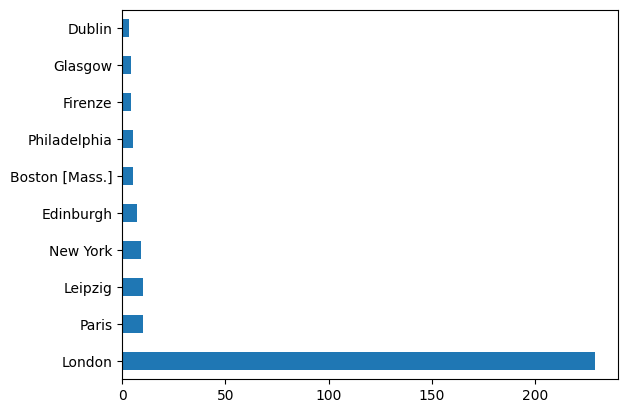

In [13]:
dt['Place of Publication'].value_counts()[:10].plot(kind='barh')